In [1]:
%pylab inline
from simulation import *
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.anchored_artists import AnchoredText
import sys
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
import matplotlib.gridspec as gridspec
import os


Populating the interactive namespace from numpy and matplotlib


In [2]:
gamelogs = [file for file in os.listdir("./gamelogs") if file.endswith("txt")]

#gamelogs = ["nbafinals/game1"]
#gamelogs = ["nbafinals/game1","nbafinals/game2","nbafinals/game3","nbafinals/game4","nbafinals/game5"]
#gamelogs += ["nbafinals/cavspacers1","nbafinals/cavspacers2","nbafinals/cavspacers3","nbafinals/cavspacers4"]
#gamelogs += ["nbafinals/cavsraptors1","nbafinals/cavsraptors2","nbafinals/cavsraptors3","nbafinals/cavsraptors4"]
#gamelogs += ["nbafinals/cavsceltics1","nbafinals/cavsceltics2","nbafinals/cavsceltics3","nbafinals/cavsceltics4","nbafinals/cavsceltics5"]

In [3]:
Lebron_FT  = ["".join(["+" if "makes" in line else "-" for line in open("./gamelogs/"+game) if '\tLeBron' in line and "free throw" in line]) for game in gamelogs]
Lebron_3  = ["".join(["+" if "makes" in line else "-" for line in open("./gamelogs/"+game) if '\tLeBron' in line and "three" in line]) for game in gamelogs]
Kyrie_FT = ["".join(["+" if "makes" in line else "-" for line in open("./gamelogs/"+game) if '\tKyrie Irving' in line and "free throw" in line]) for game in gamelogs]
Kyrie_3  = ["".join(["+" if "makes" in line else "-" for line in open("./gamelogs/"+game) if '\tKyrie Irving' in line and "three" in line]) for game in gamelogs]
#Durant_FT  = ["".join(["+" if "makes" in line else "-" for line in open("./gamelogs/"+game) if '\tKevin Durant' in line and "free throw" in line]) for game in gamelogs]
#Durant_3  = ["".join(["+" if "makes" in line else "-" for line in open("./gamelogs/"+game) if '\tKevin Durant' in line and "three" in line]) for game in gamelogs]

JR_3 = ["".join(["+" if "makes" in line else "-" for line in open("./gamelogs/"+game) if '\tJR' in line and "three" in line]) for game in gamelogs]
#Klay_3 = ["".join(["+" if "makes" in line else "-" for line in open("./gamelogs/"+game) if '\tKlay' in line and "three" in line]) for game in gamelogs]

In [11]:
len(Lebron_3)

65

In [12]:
bron_models = evaluate_models([l for l in Lebron_FT if len(l)>0],["+","-"],alpha=1e-3,qbounds = [0,4])


In [13]:
bron_models

{'AIC': {0: 593.77934289858911,
  1: 598.43194157097332,
  2: 610.36141540500216,
  3: 637.71395043027371,
  4: 686.51815508072764},
 'DIC1': {0: 591.78191816865672,
  1: 592.4681790416148,
  2: 596.61699211050393,
  3: 609.14614224840784,
  4: 615.98735682727931},
 'DIC2': {0: 591.78449338926418,
  1: 592.50439948657527,
  2: 596.86988089202316,
  3: 610.48672612535483,
  4: 619.20895429421068},
 'LOO': {0: 591.65874161224565,
  1: 592.72066291517672,
  2: 597.2514406169887,
  3: 633.44009965977716,
  4: 691.87394011383776},
 'LPD': {0: 590.4717465667436,
  1: 588.51627067745699,
  2: 587.26769768803706,
  3: 588.45315749013287,
  4: 580.68801352442722},
 'LPPD': {0: 589.93635270586492,
  1: 586.34070841147582,
  2: 582.5767614682469,
  3: 578.53416640504531,
  4: 563.2994839482385},
 'LPPDCV2': {0: 590.40375076957935,
  1: 589.17567962181249,
  2: 587.17013550958166,
  3: 634.26212263923742,
  4: 779.68531785238554},
 'WAIC1': {0: 591.62490836289044,
  1: 592.55941222726619,
  2: 596

In [7]:
bron_0 = infer_model(Lebron_3,["+","-"],0,0)
bron_1 = infer_model(Lebron_3,["+","-"],1,1)
bron_2 = infer_model(Lebron_3,["+","-"],1,2)
bron_3 = infer_model(Lebron_3,["+","-"],1,3)
bron_4 = infer_model(Lebron_3,["+","-"],1,4)

([<matplotlib.axis.XTick at 0x10fd7ee48>,
 <a list of 5 Text xticklabel objects>)

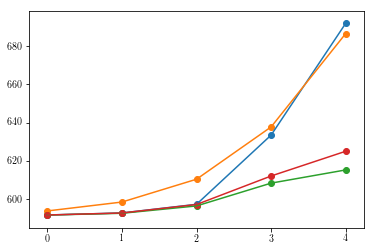

In [14]:


plt.plot([v for v in bron_models['LOO'].values()])
plt.scatter([0,1,2,3,4],[v for v in bron_models['LOO'].values()])
plt.plot([v for v in bron_models['AIC'].values()])
plt.scatter([0,1,2,3,4],[v for v in bron_models['AIC'].values()])
plt.plot([v for v in bron_models['WAIC1'].values()])
plt.scatter([0,1,2,3,4],[v for v in bron_models['WAIC1'].values()])
plt.plot([v for v in bron_models['WAIC2'].values()])
plt.scatter([0,1,2,3,4],[v for v in bron_models['WAIC2'].values()])


plt.xticks([0,1,2,3,4])

In [15]:
bron_1

(defaultdict(functools.partial(<built-in function zeros>, 2),
             {'+': array([ 0.3877551,  0.6122449]),
              '-': array([ 0.39230769,  0.60769231]),
              '0': array([ 0.34375,  0.65625])}),
 defaultdict(functools.partial(<built-in function zeros>, 2),
             {'+': array([ 37.,  59.]),
              '-': array([ 50.,  78.]),
              '0': array([ 21.,  41.])}))